32960.671855439476
46814.04781077828
121596.88966896206
287181.9726832579


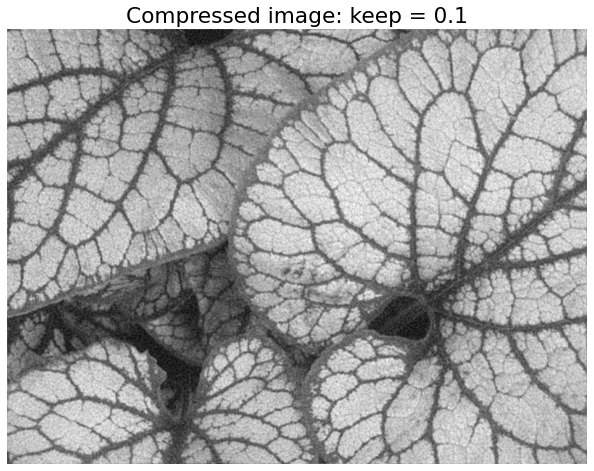

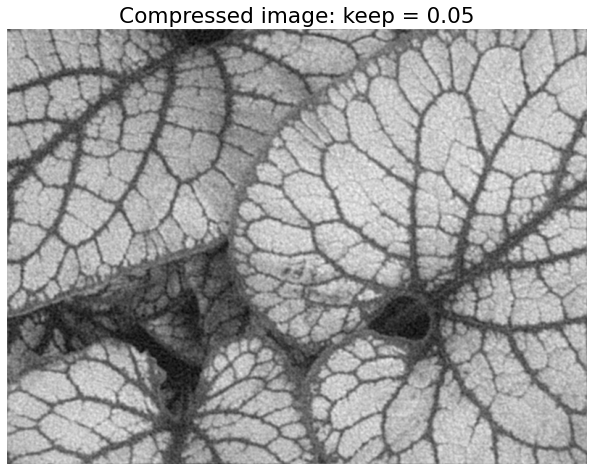

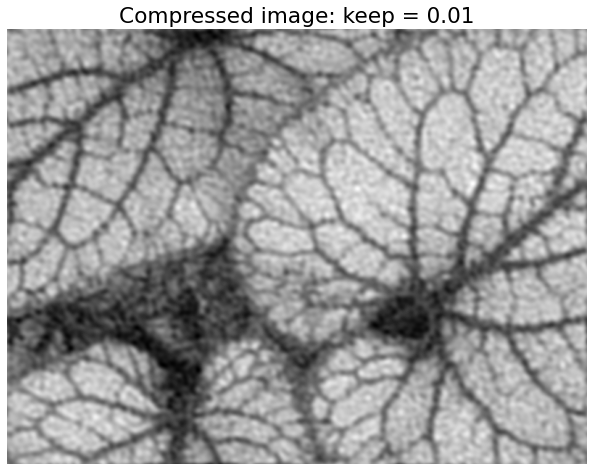

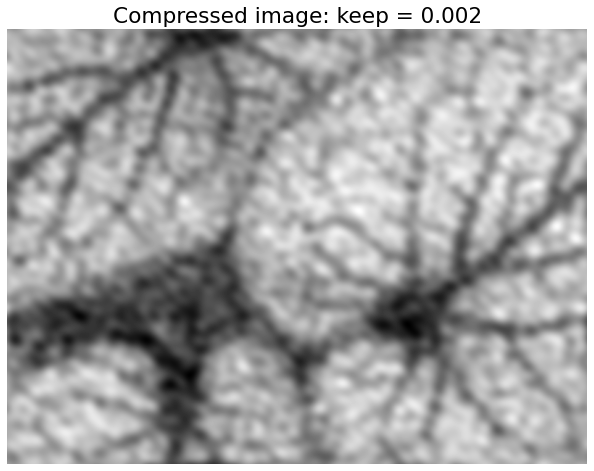

In [2]:
from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
import os
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams.update({'font.size': 18})

A = imread(os.path.join('Fractal.jpg'))
B = np.mean(A, -1); # Convert RGB to grayscale

Bt = np.fft.fft2(B)
Btsort = np.sort(np.abs(Bt.reshape(-1))) # sort by magnitude

# Zero out all small coefficients and inverse transform
for keep in (0.1, 0.05, 0.01, 0.002):
    thresh = Btsort[int(np.floor((1-keep)*len(Btsort)))]
    print(thresh)
    ind = np.abs(Bt)>thresh          # Find small indices
    Atlow = Bt * ind                 # Threshold small indices
    Alow = np.fft.ifft2(Atlow).real  # Compressed image
    plt.figure()
    plt.imshow(Alow,cmap='gray')
    plt.axis('off')
    plt.title('Compressed image: keep = ' + str(keep))

In [20]:
keep = 0.1
thresh = Btsort[int(np.floor((1-keep)*len(Btsort)))]
ind = np.abs(Bt)>thresh          # Find small indices
Atlow = Bt * ind                 # Threshold small indices
Alow = np.fft.ifft2(Atlow).real

In [21]:
ans=0;
for i in range(Alow.shape[0]):
    for j in range(Alow.shape[1]):
        if Alow[i,j]<=127.2: #considering the 255/2 is the intensity where the black spots are there (the fractals)
            ans = ans+1

In [22]:
print(ans)

168858


In [25]:
total = Atlow.shape[0]*Atlow.shape[1]

In [27]:
ratio = ans / total
print(ratio)

0.3517875


#### The size is same for both since, fft2 doesnt discard any of the pixels

In [11]:
Alow.shape[0]

600

In [ ]:
B.shape

In [ ]:
Bt.shape

In [ ]:
print(ind)

In [ ]:
print(Bt)

In [ ]:
print(thresh)